# 1.Preparation des donnees
Ici nous allons tout d'abord effectuer la concatenation des deux fichiers csv en un seul fichier

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:

donne1 = pd.read_csv("donnees_agro_part1.csv",sep=";",encoding="utf-8")
donne2 = pd.read_csv("donnees_agro_part2.csv", sep=";",encoding ="utf-8")

donnee_final = pd.concat([donne1,donne2] , ignore_index = True)
donnee_final.to_csv("fichier_final.csv", sep =";",index ="false",encoding="utf-8")
donnee_final.head(10)

,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
0,232.19,13.39,24.22,27.67,64.81,Organique,9822.03,71.98,15.06,4.25
1,131.66,13.48,23.51,24.70,74.50,Organique,9136.39,69.38,15.31,1.28
2,257.58,9.36,52.08,20.63,69.26,Micro-éléments,9961.21,74.37,10.52,1.26
3,209.21,6.51,34.66,7.12,54.77,Organique,2964.90,61.01,11.88,5.65
4,28.25,11.39,45.60,28.15,69.90,NPK_10-10-10,8313.76,59.00,13.21,3.18
5,292.69,10.62,23.44,22.41,45.23,NPK_20-10-10,9602.20,75.53,13.34,2.32
6,228.34,12.75,15.10,32.95,63.13,NPK_15-15-15,7894.04,68.66,15.58,4.30
7,235.82,12.52,42.97,21.60,38.87,K_plus,10373.80,77.04,13.52,2.59
8,38.43,6.78,28.02,24.51,47.61,NPK_15-15-15,7016.74,55.93,12.74,2.11
9,135.12,9.84,37.59,17.33,36.85,NPK_10-10-10,7356.15,67.02,12.83,2.58


In [68]:
donnee_final= pd.read_csv("fichier_final.csv", sep =";",encoding="utf-8")
donnee_final.head(10)

,Unnamed: 0,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
0,0,232.19,13.39,24.22,27.67,64.81,Organique,9822.03,71.98,15.06,4.25
1,1,131.66,13.48,23.51,24.70,74.50,Organique,9136.39,69.38,15.31,1.28
2,2,257.58,9.36,52.08,20.63,69.26,Micro-éléments,9961.21,74.37,10.52,1.26
3,3,209.21,6.51,34.66,7.12,54.77,Organique,2964.90,61.01,11.88,5.65
4,4,28.25,11.39,45.60,28.15,69.90,NPK_10-10-10,8313.76,59.00,13.21,3.18
5,5,292.69,10.62,23.44,22.41,45.23,NPK_20-10-10,9602.20,75.53,13.34,2.32
6,6,228.34,12.75,15.10,32.95,63.13,NPK_15-15-15,7894.04,68.66,15.58,4.30
7,7,235.82,12.52,42.97,21.60,38.87,K_plus,10373.80,77.04,13.52,2.59
8,8,38.43,6.78,28.02,24.51,47.61,NPK_15-15-15,7016.74,55.93,12.74,2.11
9,9,135.12,9.84,37.59,17.33,36.85,NPK_10-10-10,7356.15,67.02,12.83,2.58


# Separons les variables explicatives des variables cibles

In [70]:
#Ici les donnees presente dans X sont les variables explicatives et celle dans Y les variables cibles
X=donnee_final[["Dose d'engrais (kg/ha)","Heures d'ensoleillement (h/j)","Volume d'eau (mm/sem)","Température (°C)","Humidité (%)","Types de nutriments"]]
Y=donnee_final[["Rendement (kg)", "Taille des fruits (mm)","Teneur en solides solubles (Brix)","Niveau de défauts (%)"]]

In [71]:
#Encode de type de nutriments
X_encoded = pd.get_dummies(X , columns=['Types de nutriments'],drop_first=True , dtype=int)

# Standardisation

In [72]:
X_Scaler = StandardScaler()
X_Scaled = X_Scaler.fit_transform(X_encoded)
X_Scaled = pd.DataFrame(X_Scaled , columns = X_encoded.columns)
print(X_Scaled.mean())
print(X_Scaled.std())
X_Scaled.head()

Dose d'engrais (kg/ha)               -6.754881e-16
Heures d'ensoleillement (h/j)        -6.441176e-16
Volume d'eau (mm/sem)                 9.100152e-16
Température (°C)                     -3.358407e-16
Humidité (%)                         -1.281968e-15
Types de nutriments_K_plus            1.011919e-16
Types de nutriments_Micro-éléments    2.448530e-17
Types de nutriments_NPK_10-10-10      7.885603e-17
Types de nutriments_NPK_15-15-15      3.682743e-17
Types de nutriments_NPK_20-10-10      2.134826e-17
Types de nutriments_Organique        -2.307843e-17
dtype: float64
Dose d'engrais (kg/ha)                1.0
Heures d'ensoleillement (h/j)         1.0
Volume d'eau (mm/sem)                 1.0
Température (°C)                      1.0
Humidité (%)                          1.0
Types de nutriments_K_plus            1.0
Types de nutriments_Micro-éléments    1.0
Types de nutriments_NPK_10-10-10      1.0
Types de nutriments_NPK_15-15-15      1.0
Types de nutriments_NPK_20-10-10      1.0
Type

,Dose d'engrais (kg/ha),Heures d'ensoleillement (h/j),Volume d'eau (mm/sem),Température (°C),Humidité (%),Types de nutriments_K_plus,Types de nutriments_Micro-éléments,Types de nutriments_NPK_10-10-10,Types de nutriments_NPK_15-15-15,Types de nutriments_NPK_20-10-10,Types de nutriments_Organique
0,0.948819,1.520031,-0.334467,0.948962,0.279023,-0.33383,-0.368549,-0.468650,-0.436593,-0.452053,2.479864
1,-0.212096,1.551207,-0.375474,0.452037,0.838361,-0.33383,-0.368549,-0.468650,-0.436593,-0.452053,2.479864
2,1.242021,0.124043,1.274609,-0.228933,0.535892,-0.33383,2.713341,-0.468650,-0.436593,-0.452053,-0.403248
3,0.683447,-0.863193,0.268503,-2.489353,-0.300518,-0.33383,-0.368549,-0.468650,-0.436593,-0.452053,2.479864
4,-1.406268,0.827233,0.900352,1.029273,0.572834,-0.33383,-0.368549,2.133789,-0.436593,-0.452053,-0.403248


# 2. ACP
# A- Appliquons l'ACP sur les variables explicatives

In [73]:
pca = PCA()
X_pca = pca.fit_transform(X_Scaled)


[0.11033895 0.10883563 0.10664123 0.10406641 0.10162869 0.09115439
 0.09097523 0.09087352 0.09079909 0.09073357 0.0139533 ]


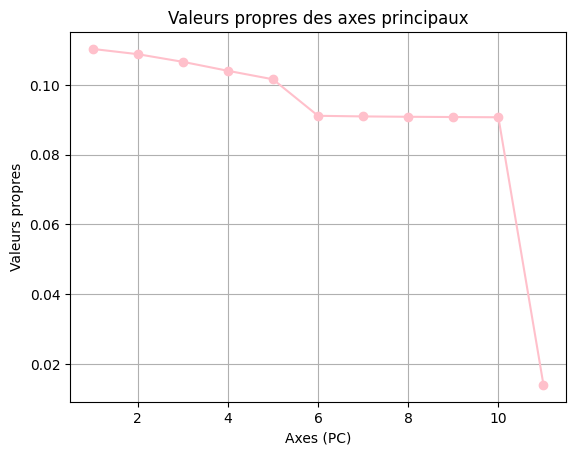

In [74]:
#Variance par axe
variance = pca.explained_variance_ratio_ 
print(variance)
plt.figure()
plt.plot(range(1,12), variance, marker="o",color='pink')
plt.xlabel("Axes (PC)")
plt.ylabel("Valeurs propres")
plt.title("Valeurs propres des axes principaux")
plt.grid(True)
plt.show()


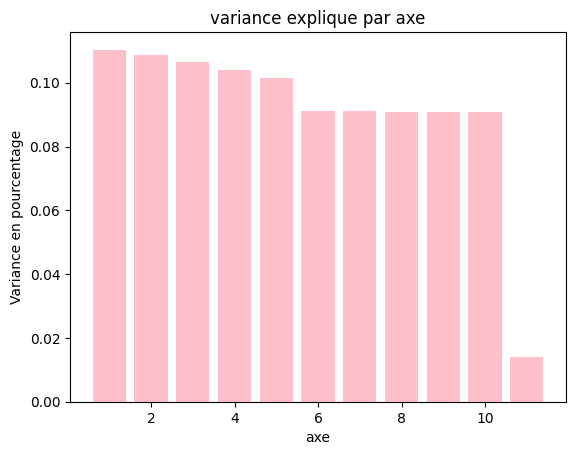

In [75]:
#Variance par axe
variance = pca.explained_variance_ratio_ 
plt.bar(range(1 , len(variance)+1) , variance ,color='pink')
plt.xlabel('axe')
plt.ylabel('Variance en pourcentage')
plt.title('variance explique par axe')
plt.show()

# Interpreation
Nous remarquons ici une abscence de coude ce qui  signifie que ce jeu de donnee ne possede pas de composante dominante et que l'information est repartie sur plusieurs axes . Nous remarquons aussi une chute brutale au passage a l'axe 11 signifiant que ce dernier explique tres peu la variance.

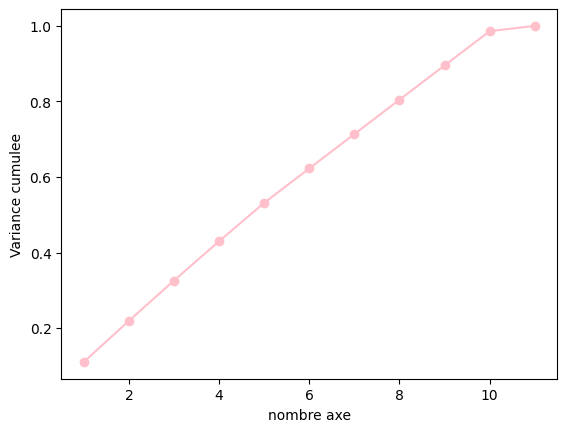

In [76]:
# variance cumulee 
variance_cumulee =  np.cumsum(variance)
plt.plot(range(1, len(variance_cumulee)+1) , variance_cumulee , 'o-' , color='pink')
plt.xlabel('nombre axe')
plt.ylabel('Variance cumulee')
plt.show()

 # B-  Nombre de composante pour atteindre 95% de la variance

In [77]:
n95= np.argmax(variance_cumulee >= 0.95) + 1
print("pour atteindre 95% de la variance il nous faut", n95)

pour atteindre 95% de la variance il nous faut 10


# C- Selectionnons les composants pour atteindre 95% et Continuons l'ACP et interpretation

In [78]:
# Selectionnons les 10 composant qui donne une variance a 95%
pca_reduit = PCA(n_components=10)
X_pca_reduit= pca_reduit.fit_transform(X_Scaled)

In [79]:
X_Final = pd.DataFrame(X_pca_reduit , columns=[f'PC{i+1}' for i in range(10)])
X_Final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.243381,0.368824,2.230854,-1.282566,-0.466665,-0.524152,1.302468,-0.027165,1.398203,0.572104
1,-0.246501,0.368142,2.217502,-1.280989,-0.452748,-0.123144,1.255049,-0.485759,1.136915,-0.639567
2,-0.169667,0.196263,0.622698,2.562561,-1.079069,-1.349809,0.832131,0.234770,-0.866357,0.491700
3,-0.268206,0.368244,2.238743,-1.275193,-0.393247,-1.343957,-1.385999,1.332240,-1.135445,-0.876418
4,2.158537,-0.568390,-0.519996,-0.307024,-0.195502,0.429228,0.924436,-1.910838,-0.031680,-0.346764


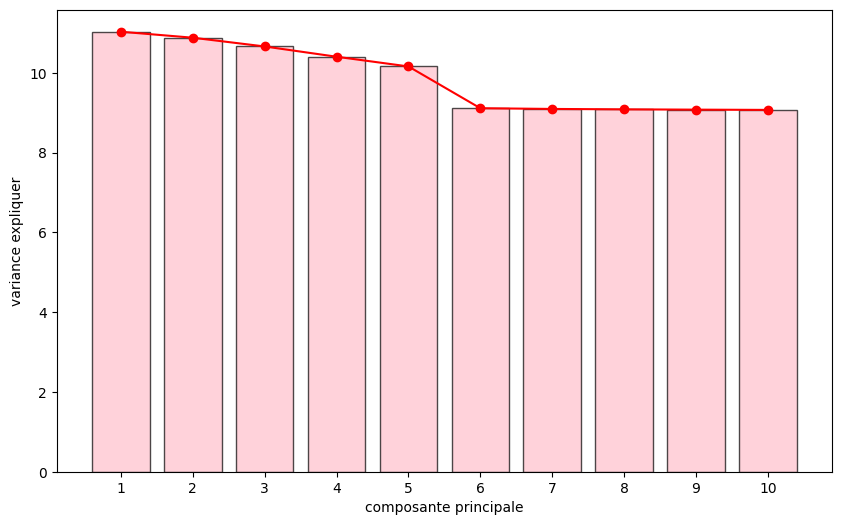

PC1 : 11.03%
PC2 : 10.88%
PC3 : 10.66%
PC4 : 10.41%
PC5 : 10.16%
PC6 : 9.12%
PC7 : 9.10%
PC8 : 9.09%
PC9 : 9.08%
PC10 : 9.07%


In [80]:
variance_exp= pca_reduit.explained_variance_ratio_  * 100
plt.figure(figsize=(10,6))
plt.bar(range(1, len(variance_exp)+1) , variance_exp , alpha=0.7 , color='pink', edgecolor='black')
plt.plot(range(1,len(variance_exp)+1) , variance_exp , 'ro-')
plt.xlabel('composante principale')
plt.ylabel('variance expliquer')
plt.xticks(range (1 , len(variance_exp)+1))
plt.show()         
for i, v in enumerate(variance_exp):
    print(f"PC{i+1} : {v:.2f}%")

 # 3- Regression Lineaire

In [81]:
# Standardisation des variables cibles
Y_Scaler = StandardScaler()
Y_Scaled = Y_Scaler.fit_transform(Y)
Y_Scaledd = pd.DataFrame(Y_Scaled, columns = Y.columns)
print(Y_Scaled.mean())
print(Y_Scaled.std())
Y_Scaledd.head()

-1.0689493734616917e-16
1.0


,Rendement (kg),Taille des fruits (mm),Teneur en solides solubles (Brix),Niveau de défauts (%)
0,1.295733,1.213173,1.311996,0.150030
1,0.906780,0.807044,1.457727,-1.352157
2,1.374687,1.586499,-1.334494,-1.362273
3,-2.594209,-0.500379,-0.541713,0.858131
4,0.440115,-0.814348,0.233580,-0.391162


# Separation et Entrainement(80% train et 20% test)

In [82]:
X_train , X_test , Y_train , Y_test= train_test_split(X_pca_reduit , Y_Scaled, test_size = 0.2, random_state = 42)



# Utilisationn de pytorch pour realiser l'entrainement 

In [83]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = torch.FloatTensor(X_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
Y_train_tensor = torch.FloatTensor(Y_train).to(device)
Y_test_tensor = torch.FloatTensor(Y_test).to(device)
class RegressionLineaire(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionLineaire, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [84]:
input_dim = X_train.shape[1]  
output_dim = Y_train.shape[1]  

modele = RegressionLineaire(input_dim, output_dim).to(device)
critere = nn.MSELoss()
optimiseur = torch.optim.Adam(modele.parameters(), lr=0.01)
print(modele)


RegressionLineaire(
  (linear): Linear(in_features=10, out_features=4, bias=True)
)


ENTRAÎNEMENT DU MODÈLE
Epoch [100/1000], Perte : 0.3353
Epoch [200/1000], Perte : 0.3248
Epoch [300/1000], Perte : 0.3247
Epoch [400/1000], Perte : 0.3247
Epoch [500/1000], Perte : 0.3247
Epoch [600/1000], Perte : 0.3247
Epoch [700/1000], Perte : 0.3247
Epoch [800/1000], Perte : 0.3247
Epoch [900/1000], Perte : 0.3247
Epoch [1000/1000], Perte : 0.3247

 Entraînement terminé !


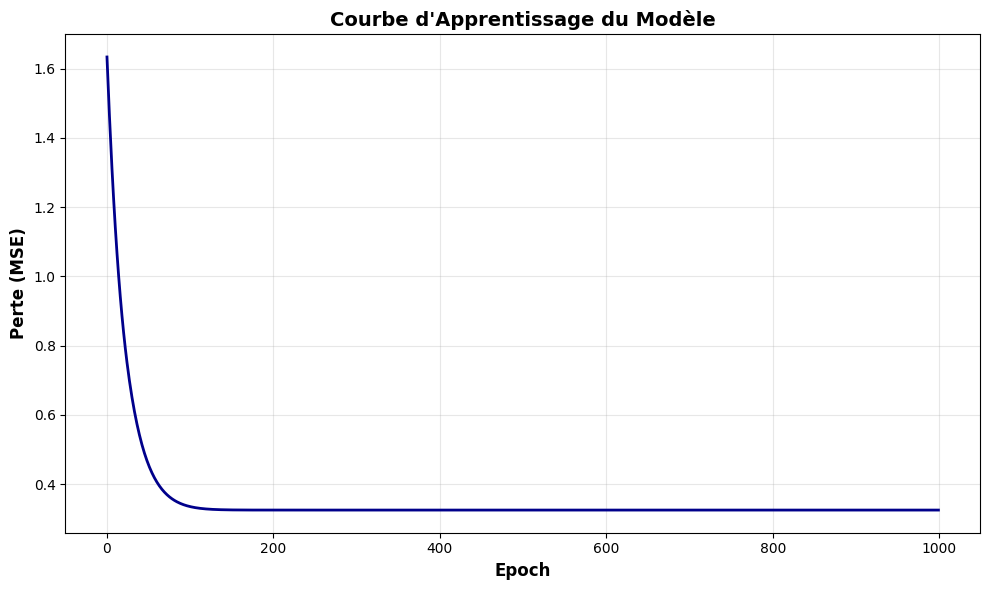


 Perte initiale : 1.6336
 Perte finale : 0.3247
 Réduction : 80.12%


In [85]:
num_epochs = 1000
losses = []
print("ENTRAÎNEMENT DU MODÈLE")
for epoch in range(num_epochs):
    predictions = modele(X_train_tensor)
    loss = critere(predictions, Y_train_tensor)
    optimiseur.zero_grad()
    loss.backward()
    optimiseur.step()
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Perte : {loss.item():.4f}")

print("\n Entraînement terminé !")
plt.figure(figsize=(10, 6))
plt.plot(losses, linewidth=2, color='darkblue')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Perte (MSE)', fontsize=12, fontweight='bold')
plt.title('Courbe d\'Apprentissage du Modèle', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print(f"\n Perte initiale : {losses[0]:.4f}")
print(f" Perte finale : {losses[-1]:.4f}")
print(f" Réduction : {((losses[0] - losses[-1]) / losses[0] * 100):.2f}%") 

 # 4- Evalutation et Interpretation

 # A- Evaluons la performance du modele grace a des metriques

In [86]:
modele.eval()
with torch.no_grad():
    Y_pred_train = modele(X_train_tensor).cpu().numpy()
    Y_pred_test = modele(X_test_tensor).cpu().numpy()

Y_train_original = Y_Scaler.inverse_transform(Y_train)
Y_test_original = Y_Scaler.inverse_transform(Y_test)
Y_pred_train_original = Y_Scaler.inverse_transform(Y_pred_train)
Y_pred_test_original = Y_Scaler.inverse_transform(Y_pred_test)

noms_cibles = ["Rendement (kg)", "Taille des fruits (mm)", 
               "Teneur en solides solubles (Brix)", "Niveau de défauts (%)"]

for i, nom in enumerate(noms_cibles):
    r2_train = r2_score(Y_train_original[:, i], Y_pred_train_original[:, i])
    r2_test = r2_score(Y_test_original[:, i], Y_pred_test_original[:, i])
    rmse_train = np.sqrt(mean_squared_error(Y_train_original[:, i], Y_pred_train_original[:, i]))
    rmse_test = np.sqrt(mean_squared_error(Y_test_original[:, i], Y_pred_test_original[:, i]))
    print(f"\n Les resultats de l'entrainement pour {nom}")
    print(f" R2 Train : {r2_train:.4f} ")
    print(f"R2 Test : {r2_test:.4f}")
    print(f" RMSE Train : {rmse_train:.2f}  ")
    print(f"RMSE Test : {rmse_test:.2f}")



 Les resultats de l'entrainement pour Rendement (kg)
 R2 Train : 0.7045 
R2 Test : 0.7048
 RMSE Train : 957.96  
RMSE Test : 958.63

 Les resultats de l'entrainement pour Taille des fruits (mm)
 R2 Train : 0.9028 
R2 Test : 0.9026
 RMSE Train : 2.00  
RMSE Test : 2.00

 Les resultats de l'entrainement pour Teneur en solides solubles (Brix)
 R2 Train : 0.8196 
R2 Test : 0.8209
 RMSE Train : 0.73  
RMSE Test : 0.73

 Les resultats de l'entrainement pour Niveau de défauts (%)
 R2 Train : 0.2734 
R2 Test : 0.2742
 RMSE Train : 1.68  
RMSE Test : 1.69


* Le modele explique environ 70% de la variable rendement,la relation entre les composants et le rendement de la production est assez correct.Predire la variable rendement a partir de ce modele nous donnera des resultats pas vraiment fiable et est partiellement lineaire car il reste une part du modele qui n'est pas explique.
  
 * Le modele expplique 90.28% de la variable Taille de fruit , la relation entre les composants et la taille des fruits est  lineaire .L'on peut utiliser ce modele pour predire la taille des fruits et avoir des predictions fiables car elle explique plus de 90% du modele et est la variable la mieux expliquer par le modele.
   
* le modele explique environ 81.96% de la variable Teneur en solides solubles , la relation entre les composant et la teneur en solides solubles  est une relation quasiement lineaire. Utiliser ce modele pour predire  la variable nous donnera des predictions assez fiables et precise.

* le modele explique 27.34% de la variable niveau de defauts ,  la relation estfaible et n'est pas du tout lineaire ,utiliser notre modele pour predrire cette variable nous donnera des predictions non fiable et non precise

# B- Analyser les coefficient de regression 

In [87]:
coefficients = modele.linear.weight.detach().cpu().numpy()
biais = modele.linear.bias.detach().cpu().numpy()

for i, nom in enumerate(noms_cibles):
    print(f"\n Coefficients pour {nom}")
    for j in range(coefficients.shape[1]):
        print(f"   CP{j+1} : {coefficients[i, j]:.4f}")
    print(f"   Biais (intercept) : {biais[i]:.4f}")



 Coefficients pour Rendement (kg)
   CP1 : -0.0370
   CP2 : -0.0100
   CP3 : -0.0063
   CP4 : -0.0084
   CP5 : -0.0028
   CP6 : -0.4574
   CP7 : 0.4534
   CP8 : -0.2316
   CP9 : 0.1080
   CP10 : 0.4710
   Biais (intercept) : 0.0002

 Coefficients pour Taille des fruits (mm)
   CP1 : -0.0279
   CP2 : -0.0023
   CP3 : 0.0097
   CP4 : -0.0051
   CP5 : 0.0088
   CP6 : -0.7003
   CP7 : 0.3819
   CP8 : 0.2048
   CP9 : 0.1639
   CP10 : 0.4421
   Biais (intercept) : 0.0001

 Coefficients pour Teneur en solides solubles (Brix)
   CP1 : 0.0143
   CP2 : 0.0481
   CP3 : 0.0865
   CP4 : 0.0111
   CP5 : 0.0140
   CP6 : 0.0569
   CP7 : 0.2192
   CP8 : -0.1172
   CP9 : 0.8441
   CP10 : -0.1749
   Biais (intercept) : 0.0003

 Coefficients pour Niveau de défauts (%)
   CP1 : 0.0289
   CP2 : 0.0004
   CP3 : -0.0310
   CP4 : 0.0026
   CP5 : 0.0100
   CP6 : 0.2154
   CP7 : -0.0198
   CP8 : -0.0267
   CP9 : -0.4274
   CP10 : -0.2027
   Biais (intercept) : -0.0004


* Concernant le rendement les composantes qui ont un reel effet  sont
  
  CP6 : -0.4577
  
  CP7:0.4534
  
  CP8:-0.2316
  
  CP9:0.1080

  CP10:0.4710
  
  les composantes CP6 , CP8  exerce un effet negatif sur le rendement , tandis que les composantes CP7  CP9 CP10 exerce un effet positif  Les autres compostantes exerce une influence negligabes
  
  La formule de prediction est donc ici :
  
 # Rendement=-0.0370xCP1 - 0.0100xCP2 -0.0063x CP3 -0.0084 x CP4 -0.0028 x CP5 -0.4574x CP6 +0.4534 X CP7 - 0.2316x CP8 - 0.1080 x CP9 + 0.4710xCP10 + C
  

* Concernant la taille des fruits les composante qui ont un reel effet sont:

   CP6 : -0.7003
   
   CP7 : 0.3819
   
   CP8 : 0.2048
   
   CP9: 0.1639

   CP10: 0.4421

   la compostante CP6 exerce une influence tres negatives sur la predictiction de la taille des fruits , tandis que les composantes CP7 , CP8 CP9 , CP10 exerce une bonne influence sur cette derniere, les autres composantes exercent une influence negligeable

   La formule de prefiction est donc ici:

   # Taille des fruits= -0.0279xCP1 -0.0023xCP2 +0.0097XCP3 -0.0051XCP4 + 0.0099 X CP5 -0.7003 X CP6 + 0.3819 X CP7 + 0.2048 X CP8 + 0.1639 X CP9 + 0.4421X CP10 + C

   

* Concernant les coefficient en teneur en solides solubles  les composantes qui ont un reel effet sont :

  CP7= 0.2194
  
  CP8 = -0.1172

  CP9= 0.8441

  CP10 = -0.1749

  Les  composante CP7 et CP9 exerce une influence positive sur la prediction de la variable teneur en solides solubles , tandis que CP8 et CP10 exerce une influence negatives assez faibles  , les autres composantes tant qu'a elle exerce une influence negligeable.

  La formule de prediction est donc ici :
   # Teneur_Solides_Solubles = 0.01143xCP1 +0.0491xCP2 + 0.0865XCP3 + 0.1111XCP4 +0.0140XCP5 + 0.0569xCP6 + 0.2192XCP7 -0.1172XCP8 +0.8441XCP9 -0.1749X CP10 + C


* Concernant les coefficients des niveaux de defauts les variables ayant un reel effet sont :

CP6 = 0.2154

CP9 =-0.4274

CP10 = -0.2027

la composante CP6 exerce un  effet positif sur la prediction de la variable , tandis que la composante CP9 et CP10 exerce un effet negatif sur la prediction de celle ci , les autres  exerce elles aussi une influence assez negligeable ne permettant pas a notre modele de predire correctement la variable Niveau de defaut.

La formule de prediction est donc ici :

# Niveau de defaut  = 0.0289xCP1 +0.004XCP2 -0.0310XCP3 + 0.0026XCP4 +0.0100XCP5 +0.2154XCP6 -0.0198XCP7 -0.0267XCP8 -0.4274CP9 -0.2027XCP10
